In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://drive.google.com/file/d/1De_3iOdzx02YXYNEI1vsEmy2maQ--LR5/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, index_col = ["name", "artist"])
df

In [ ]:
songs_df = df.copy()
songs_df

In [ ]:
songs_df.drop(["id", "html", "type"], axis=1, inplace=True)

In [ ]:
songs_df.describe()

In [ ]:
songs_df.hist(figsize=(20,10));

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_df = RobustScaler().fit_transform(songs_df)
songs1 = pd.DataFrame(robust_df, columns=songs_df.columns, index=songs_df.index)

In [ ]:
from sklearn.metrics import pairwise_distances
s_df1 = pd.DataFrame(pairwise_distances(songs1), index=songs1.index)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 15, random_state = 48)
km.fit(songs1)

KMeans(n_clusters=15)

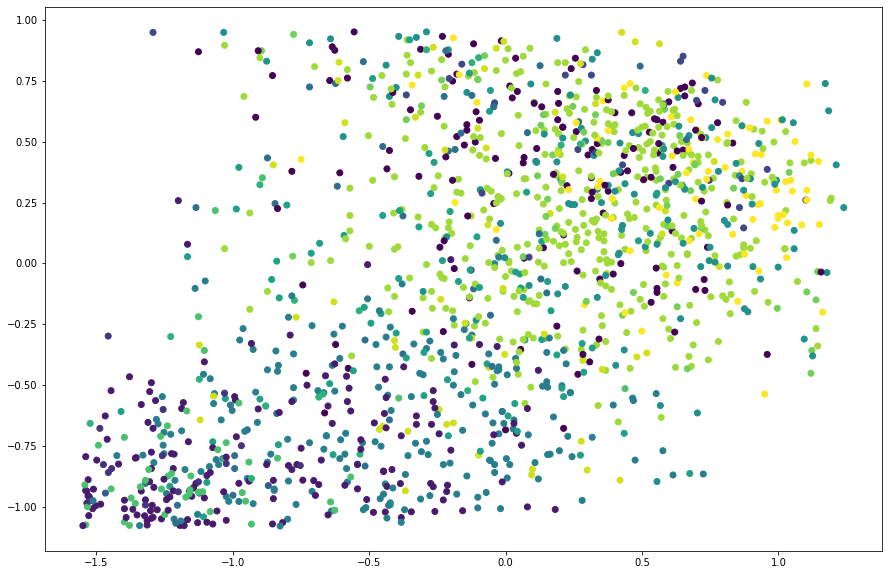

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(x=songs1.iloc[:, 0], y=songs1.iloc[:, 1], c= km.labels_);

In [ ]:
wcss = [] 
for i in range(5,30):
    km = KMeans(n_clusters= i, random_state=48)
    km.fit(songs1)
    wcss.append(km.inertia_)
wcss

[8616.576950907482,
 7655.980149672402,
 7035.389019356562,
 6654.934638475708,
 6320.496389320212,
 6029.765373243508,
 5764.158686618406,
 5503.227695062905,
 5320.977129491843,
 5159.895596450086,
 4989.252903232673,
 4856.772762232991,
 4822.335120877153,
 4630.178880514326,
 4543.201236934461,
 4484.52600695236,
 4390.341223705395,
 4312.313156862425,
 4262.404594262129,
 4208.103503156832,
 4161.429975911355,
 4093.384206540757,
 4017.9042921206237,
 4003.255321287998,
 3965.7717914358655]

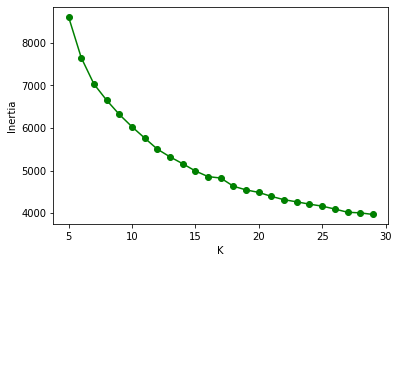

In [ ]:
plt.plot(range(5,30), wcss, 'og-')
plt.annotate('Elbow', xy=(5, 500), xytext=(6, 1000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

In [ ]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 3)
km.fit(songs1)
silhouette_score(songs1, km.labels_)

0.37900423589452226

In [ ]:
sil_scores = [] 
for i in range(5,25):
    km = KMeans(n_clusters= i, random_state=48)
    km.fit(songs1)
    sil_scores.append(silhouette_score(songs1, km.labels_))

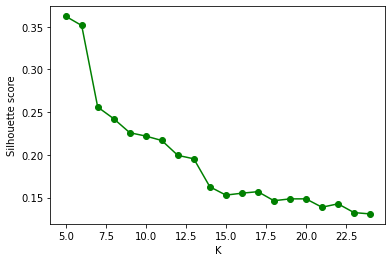

In [ ]:
plt.plot(range(5,25), sil_scores, 'og-')
plt.xlabel("K")
plt.ylabel("Silhouette score");

In [ ]:
songs1.loc[:,"cluster"] = km.labels_
songs1